# MACD- Moving Average Convergence Divergence

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('futures_banknifty_currentmonth.csv')[["date","time","open","high","low","close","volume"]]
df

,date,time,open,high,low,close,volume
0,2022-11-11,09:15:00,42350.0,42350.00,42184.05,42224.9,343725
1,2022-11-11,09:18:00,42221.1,42248.30,42191.80,42248.3,96225
2,2022-11-11,09:21:00,42244.9,42247.35,42190.00,42195.1,70925
3,2022-11-11,09:24:00,42196.1,42218.95,42196.15,42203.2,60375
4,2022-11-11,09:27:00,42203.4,42209.15,42171.90,42176.6,72425
...,...,...,...,...,...,...,...
120,2022-11-11,15:15:00,42284.0,42293.20,42250.05,42263.1,52600
121,2022-11-11,15:18:00,42263.1,42274.75,42257.10,42266.1,31500
122,2022-11-11,15:21:00,42270.8,42306.65,42263.00,42300.0,55350
123,2022-11-11,15:24:00,42300.0,42305.45,42292.00,42300.6,50325


In [4]:
def MACD(df):
    df['EMA12'] = df.close.ewm(span=12).mean()
    df['EMA26'] = df.close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span=9).mean()


In [5]:
MACD(df)

In [6]:
df

,date,time,open,high,low,close,volume,EMA12,EMA26,MACD,signal
0,2022-11-11,09:15:00,42350.0,42350.00,42184.05,42224.9,343725,42224.900000,42224.900000,0.000000,0.000000
1,2022-11-11,09:18:00,42221.1,42248.30,42191.80,42248.3,96225,42237.575000,42237.050000,0.525000,0.291667
2,2022-11-11,09:21:00,42244.9,42247.35,42190.00,42195.1,70925,42220.996998,42221.977772,-0.980775,-0.229826
3,2022-11-11,09:24:00,42196.1,42218.95,42196.15,42203.2,60375,42215.379181,42216.728328,-1.349147,-0.608999
4,2022-11-11,09:27:00,42203.4,42209.15,42171.90,42176.6,72425,42204.843016,42207.422403,-2.579387,-1.195145
...,...,...,...,...,...,...,...,...,...,...,...
120,2022-11-11,15:15:00,42284.0,42293.20,42250.05,42263.1,52600,42304.268803,42310.653612,-6.384810,0.383476
121,2022-11-11,15:18:00,42263.1,42274.75,42257.10,42266.1,31500,42298.396679,42307.353069,-8.956390,-1.484497
122,2022-11-11,15:21:00,42270.8,42306.65,42263.00,42300.0,55350,42298.643344,42306.808355,-8.165011,-2.820600
123,2022-11-11,15:24:00,42300.0,42305.45,42292.00,42300.6,50325,42298.944368,42306.348444,-7.404076,-3.737295


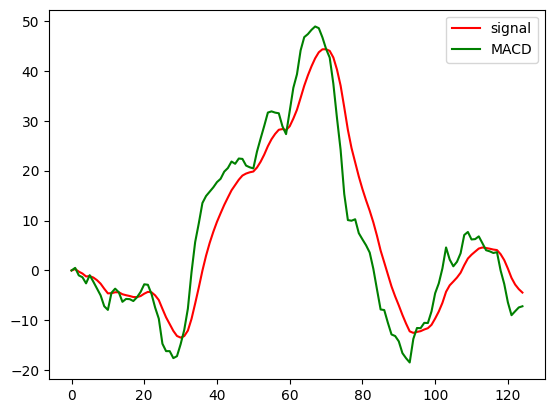

In [7]:
plt.plot(df.signal, label="signal", color="red")
plt.plot(df.MACD, label="MACD", color="green")
plt.legend()
plt.show()

In [8]:
import plotly.express as px

In [24]:
fig = px.line(df, x="time", y=["signal","MACD"],
              hover_data={"date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [10]:
Buy, Sell = [],[]

for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)

In [11]:
Buy

[5, 11, 19, 31, 60, 95]

In [12]:
Sell

[2, 6, 14, 22, 59, 71, 114]

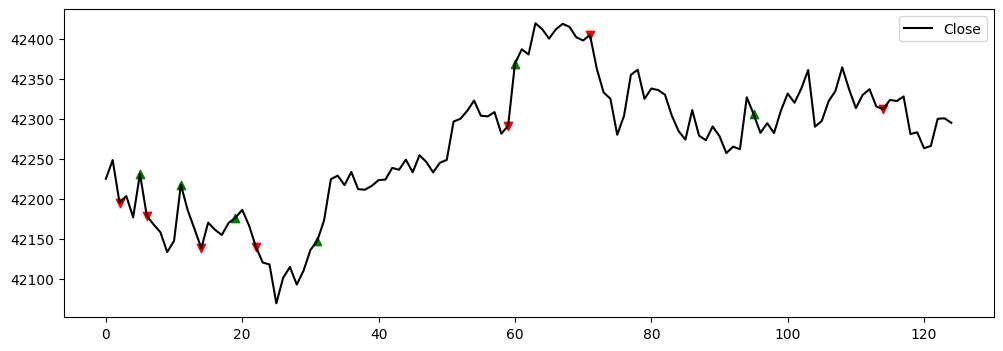

In [43]:
plt.figure(figsize=(12,4))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].close, marker="^", color="green")
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].close, marker="v", color="red")
plt.plot(df.close,label="Close",color="k")
plt.legend()
plt.show()

In [44]:
RealBuy = [i+1 for i in Buy]
RealSell = [i+1 for i in Sell]

In [45]:
BuyPrices = df.open.iloc[RealBuy]
SellPrices = df.open.iloc[RealSell]

In [46]:
BuyPrices

6     42228.8
12    42217.4
20    42174.0
32    42140.1
61    42367.1
96    42305.9
Name: open, dtype: float64

In [47]:
SellPrices

3      42196.1
7      42171.2
15     42141.4
23     42130.1
60     42297.2
72     42402.0
115    42305.4
Name: open, dtype: float64

In [48]:
if SellPrices.index[0] < BuyPrices.index[0]:
    SellPrices = SellPrices.drop(SellPrices.index[0])
elif BuyPrices.index[-1] > SellPrices.index[-1]:
    BuyPrices = BuyPrices.drop(BuyPrices.index[-1])

In [56]:
len(SellPrices)

6

In [67]:
profitsrel = []

for i in range(len(SellPrices)):
    profitsrel.append((SellPrices[i]-BuyPrices[i])/BuyPrices[i])

KeyError: 0